<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt


In [29]:
link =  "https://raw.githubusercontent.com/ZahraMoeini/Regression/main/Data/kc_house_data.csv"

***Read Data***

In [30]:
data = pd.read_csv(link, error_bad_lines=False )

In [31]:
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

featuer selection

In [50]:
features=data.columns
hm=data[features].corr()


pandas.core.frame.DataFrame

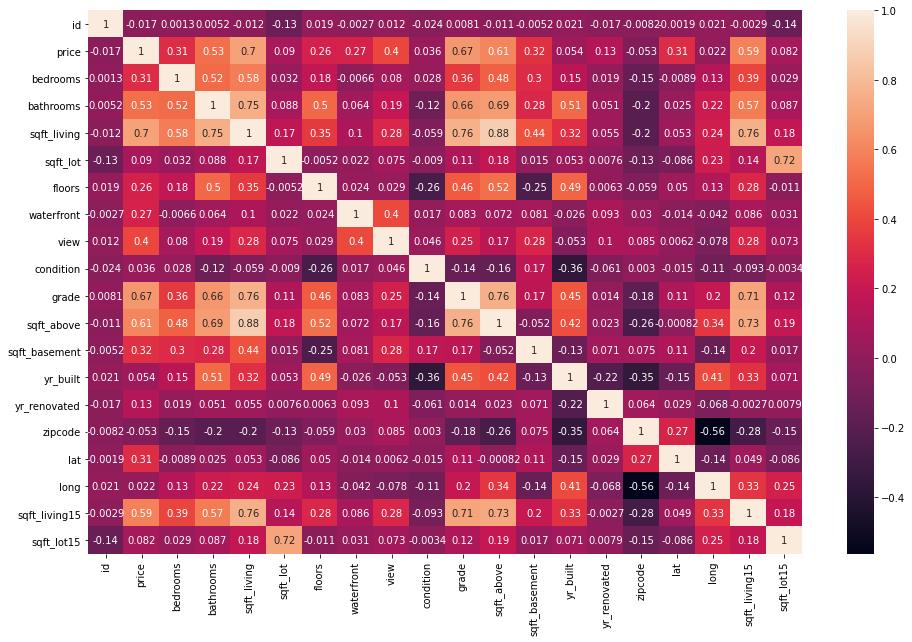

In [35]:
plt.figure(figsize = (16,10))
g=sns.heatmap(hm,annot=True,annot_kws={'size':10})

In [61]:
hm.columns[1]

'price'

In [80]:
def select_from_cv(l):
  print(l)
  max = -np.inf
  for item in l:
    if hm[item]['price']> max:
      max =hm[item]['price']
      max_f =item
  return item


In [81]:
selected_features=[]
visited_features=[]
t=0.5
for i in range(hm.shape[0]):
  c_visited_features=[]
  for j in range(hm.shape[1]):
    if hm.index[i] !='price' and hm.columns[j]!='price':
      if hm.iloc[i,j]>=np.abs(t):
        if hm.index[i] not in  selected_features:          
          c_visited_features.append(hm.index[i])
          if hm.columns[j] not in  selected_features:
            c_visited_features.append(hm.columns[j])            
            selected_features.append(select_from_cv(c_visited_features))     
   


['id', 'id']
['bedrooms', 'bedrooms']
['bathrooms', 'bathrooms', 'bathrooms']
['sqft_living', 'sqft_living', 'sqft_living', 'sqft_living']
['sqft_lot', 'sqft_lot']
['floors', 'floors', 'floors']
['waterfront', 'waterfront']
['view', 'view']
['condition', 'condition']
['grade', 'grade', 'grade', 'grade']
['sqft_above', 'sqft_above', 'sqft_above', 'sqft_above', 'sqft_above', 'sqft_above']
['sqft_basement', 'sqft_basement']
['yr_built', 'yr_built', 'yr_built']
['yr_renovated', 'yr_renovated']
['zipcode', 'zipcode']
['lat', 'lat']
['long', 'long']
['sqft_living15', 'sqft_living15', 'sqft_living15', 'sqft_living15', 'sqft_living15', 'sqft_living15']
['sqft_lot15', 'sqft_lot15', 'sqft_lot15']


In [82]:
selected_features

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

***Lasso***

In [ ]:
y=data['price']
X=data
X=X.drop(['price'],axis=1)
X.head()


In [ ]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
H=X[features]

In [ ]:
X_train_val, X_test , y_train_val, y_test = train_test_split(H, y, test_size=0.5, random_state=1)
X_train_val.shape

In [ ]:
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)
X_train.shape

***lambda***

In [ ]:
alphas1 = np.array([1e-5,1e-10,1e-15,1e-20, 1e-100])
alphas2 = np.linspace(1,0.01,10)
alphas3 = np.linspace(5000,2,100)
alphas  = np.append(alphas3, alphas2)
alphas  = np.append(alphas, alphas1)
alphas


In [ ]:

lasso = Lasso(normalize=True)
coefs = []
mse_val = []
mse_train = []

In [ ]:
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    pred_val = lasso.predict(X_val)
    pred_train = lasso.predict(X_train)
    mse_val.append(mean_squared_error(y_val, pred_val))
    mse_train.append(mean_squared_error(y_train, pred_train))

In [ ]:
coef_array =np.zeros((len(features),len(alphas)))
for i in range(len(features)):
    for j in range(len(alphas)):
        coef_array[i,j]= coefs[j][i]
        

In [ ]:
fig = plt.figure(figsize=(15,5))
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(features))]
plt.xlim(min(alphas),max(alphas))
for i in range(coef_array.shape[0]):
    plt.plot(alphas,coef_array[i,:],color=colors[i],label=str(features[i]))
plt.legend(loc='upper right')

In [ ]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
sorted_features=[]

for j in range(len(alphas)):
  for i in range(len(features)):
    if coef_array[i,j]==0 and features[i] not in sorted_features:
      sorted_features.append(features[i])
  

In [ ]:
sorted_features

In [ ]:
elected_features = sorted_features [int(len(sorted_features)*0.4):]
elected_features